# Part I - Ford GoBike System Data Analysis
## by Dalal Bin Gheshiyan

## Introduction

>This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.


## Preliminary Wrangling


## Data Gathering

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Read the dataset
df = pd.read_csv('201902-fordgobike-tripdata.csv');

## Assessing Data

In [3]:
#defining shape
df.shape

(183412, 16)

In [4]:
#Data visualisation
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [5]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


1. Some values are missing.
2.  user_type, member_gender and should be category data type. 
3. bike_share_for_all_trip  should be boolean data type. 
4. start_time, and end_time should be of type date. 
5. start_station_id, end_station_id, and bike_id should be of type object(string). 

In [6]:
# Check duplicated row
df.duplicated().sum()

0

In [8]:
# Check null value for each column
df.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

Dataset has null values for start_station_id, start_station_name, end_station_id, end_station_name, member_birth_year , and member_gender  

In [9]:
#statical analysis
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [10]:
# loop for some attributes to further investigation 
for i in df[['bike_share_for_all_trip', 'member_gender', 'user_type']]:
    print(df[i].value_counts())
    print('\n')

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64


Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64


Subscriber    163544
Customer       19868
Name: user_type, dtype: int64




## Cleaning Data

In [11]:
# Make copies of original piece of data
df_copy = df.copy()
df_copy.shape

(183412, 16)

In [12]:
#columns ["end_station_latitude","end_station_longitude” , "start_station_longitude" ,'start_station_latitude'] are useless for my analysis, so its bettrer to drop them
df_copy = df_copy.drop(['end_station_latitude','end_station_longitude','start_station_longitude' ,'start_station_latitude' ],axis=1)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 16.8+ MB


In [13]:
df_copy = df_copy.drop(df_copy[(df_copy.member_gender == 'Other')].index)
df_copy.member_gender.value_counts()

Male      130651
Female     40844
Name: member_gender, dtype: int64

In [14]:
#deleting the record with null value  
df_copy = df_copy.dropna()
df_copy.isnull().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
end_station_id             0
end_station_name           0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

In [15]:
#change erroneous datatypes 
df_copy['start_time'] = df_copy['start_time'].astype('datetime64[ns]')
df_copy['end_time'] = df_copy['end_time'].astype('datetime64[ns]')
df_copy['start_station_id'] = df_copy['start_station_id'].astype('str')
df_copy['end_station_id'] = df_copy['end_station_id'].astype('str')
df_copy['bike_id'] = df_copy['bike_id'].astype('str')
df_copy['member_gender'] = df_copy['member_gender'].astype('category')
#df_copy['bike_share_for_all_trip'] = df_copy['bike_share_for_all_trip'].astype('bool')
df_copy['member_birth_year'] = df_copy['member_birth_year'].astype('int64')
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 12 columns):
duration_sec               171305 non-null int64
start_time                 171305 non-null datetime64[ns]
end_time                   171305 non-null datetime64[ns]
start_station_id           171305 non-null object
start_station_name         171305 non-null object
end_station_id             171305 non-null object
end_station_name           171305 non-null object
bike_id                    171305 non-null object
user_type                  171305 non-null object
member_birth_year          171305 non-null int64
member_gender              171305 non-null category
bike_share_for_all_trip    171305 non-null object
dtypes: category(1), datetime64[ns](2), int64(2), object(7)
memory usage: 15.8+ MB


In [16]:
df.bike_share_for_all_trip.value_counts()

No     166053
Yes     17359
Name: bike_share_for_all_trip, dtype: int64

In [17]:
df_copy.head(3)

,duration_sec,start_time,end_time,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),13.0,Commercial St at Montgomery St,4902,Customer,1984,Male,No
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,3.0,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,222.0,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes


### What is the structure of your dataset?

> Dataset has 171305 records with 12 features, each record belong to one trip, some features of the dataset are of datetime data type as trip start_time, end_time, and numeric feature as duration_sec, also nominal  as start_station_id, start_station_name, end_station_id, end_station_name, bike_id. along with Information about the ridear, user_type, member_gender,  bike_share_for_all_trip which are also nominal data type, and finaly member_birth_year which  is numeric in nature. 

### What is/are the main feature(s) of interest in your dataset?

> After assessing the dataset the most features I am intrested in, to answers the questions of my analysis are duration_sec, member_birth_year, and user_type.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think that member_birth_year will help understand the long of the trip as i asuume there is a relation between age of the rider and trip duration. also i sugges, start_station_name, end_station_name, and user_type can be effective on my analysis. 

## Univariate Exploration

### 1.  What is the most popular age to ride a bike?

In order to find the most age to ride a bike, i will add extra feature named age. and calculted using member_birth_year.

In [18]:
# Create age dataframe 
df_copy['age']=(2022-df_copy['member_birth_year'])
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171305 entries, 0 to 183411
Data columns (total 13 columns):
duration_sec               171305 non-null int64
start_time                 171305 non-null datetime64[ns]
end_time                   171305 non-null datetime64[ns]
start_station_id           171305 non-null object
start_station_name         171305 non-null object
end_station_id             171305 non-null object
end_station_name           171305 non-null object
bike_id                    171305 non-null object
user_type                  171305 non-null object
member_birth_year          171305 non-null int64
member_gender              171305 non-null category
bike_share_for_all_trip    171305 non-null object
age                        171305 non-null int64
dtypes: category(1), datetime64[ns](2), int64(3), object(7)
memory usage: 17.2+ MB


In [19]:
df_copy.age.describe()

count    171305.000000
mean         37.160649
std          10.116083
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max         144.000000
Name: age, dtype: float64

Age has unreal values, as there is member with age more than 100 years old

In [20]:
df_copy=df_copy.query('age <= 95')
df_copy.age.describe()

count    171231.000000
mean         37.124370
std           9.966077
min          21.000000
25%          30.000000
50%          35.000000
75%          42.000000
max          95.000000
Name: age, dtype: float64

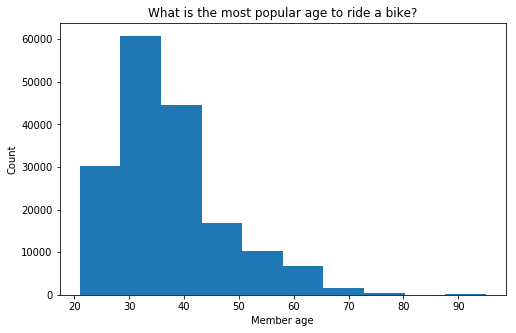

In [45]:
plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'age');
plt.ylabel('Count')
plt.xlabel('Member age')
plt.title('What is the most popular age to ride a bike?');

As illustrated, above histogram members age start from 21 to 80 with right skewed relation, then there is a gab from 80 to 90, as there is members with age graeter then 90. but most members are with age between 25 and 40.

### 2. How long does the trip take?

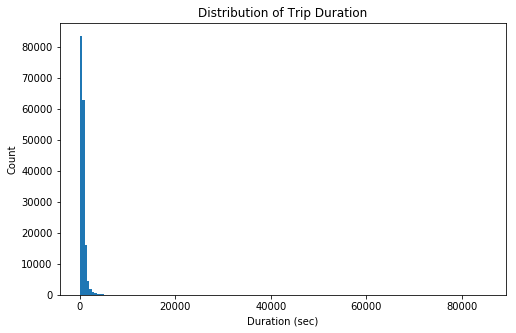

In [22]:
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df_copy['duration_sec'].max()+binsize, binsize)
plt.figure(figsize=[8, 5])
plt.hist(data = df_copy, x = 'duration_sec', bins = bins)
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')
plt.show()

Histogram does not clearly show the time of trip duration. I will check if there is an outlier on the data

In [23]:
# Describe the data
df_copy['duration_sec'].describe()

count    171231.000000
mean        697.779175
std        1577.564442
min          61.000000
25%         322.000000
50%         509.000000
75%         787.000000
max       84548.000000
Name: duration_sec, dtype: float64

duration_sec are in normal range. so I will convert the scale.

In [24]:
# Transform the describe() to a scale of log10
np.log10(df_copy['duration_sec'].describe())

count    5.233582
mean     2.843718
std      3.197987
min      1.785330
25%      2.507856
50%      2.706718
75%      2.895975
max      4.927103
Name: duration_sec, dtype: float64

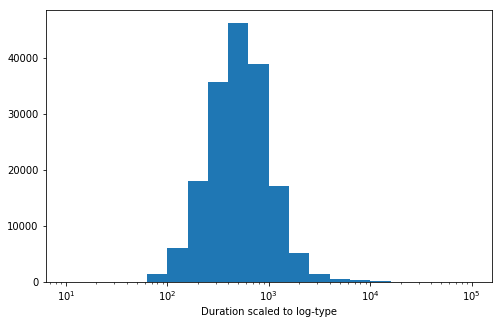

In [25]:
# Axis transformation
# Bin size
plt.figure(figsize=[8, 5])
bins = 10 ** np.arange(1, 5+0.2, 0.2)
plt.hist(data=df_copy, x='duration_sec', bins=bins);

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-axis label
plt.xlabel('Duration scaled to log-type');

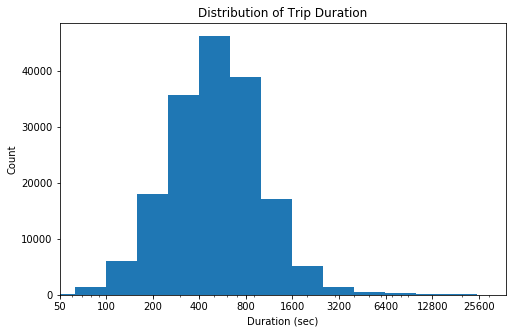

In [26]:
# Axis transformation
# Bin size
plt.figure(figsize=[8, 5])
bins = 10 ** np.arange(1, 5+0.2, 0.2)
# Generate the x-ticks 
ticks = [ 50, 100, 200 ,400,800, 1600,3200, 6400 ,  12800 ,12800*2]
# Convert ticks into string values, to be displaye dlong the x-axis
labels = ['{}'.format(v) for v in ticks]
plt.xlim(50,12800*3 )
# Plot the histogram
plt.hist(data=df_copy, x='duration_sec', bins=bins);
plt.xlabel('Duration (sec)')
plt.ylabel('Count')
plt.title('Distribution of Trip Duration')

# The argument in the xscale() represents the axis scale type to apply.
plt.xscale('log')
# Apply x-ticks
plt.xticks(ticks, labels);

As illustrated,  above histogram is right skewed as it has a “tail” on the right side of the distribution when plotted on a log-scale, and shows that the minimum duration for a trip is 60 sec and maximum 25600. with mostly 500 seconds for a trip.

### 3. Who is the most people riding a bike? customers or subscribers? 

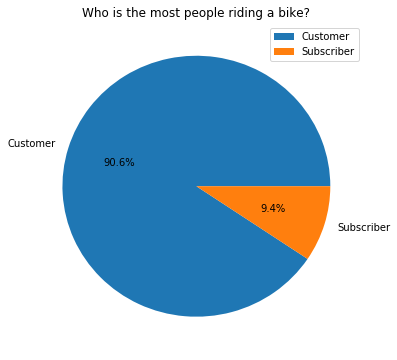

In [27]:
mylabels = ['Customer', 'Subscriber']
plt.figure(figsize=[6, 6])
plt.pie(df_copy.user_type.value_counts() , autopct='%1.1f%%', labels = mylabels)
plt.legend()
plt.title('Who is the most people riding a bike?');

Unlike I thought, customer is riding bike more than the subscriber, with a big difference. 
As illustrated in the above pie chart, Customer percentage 90.6%, while Subscriber took the second place with 9.4%.

### 4. What is the most popular places to start a bike trip?

In [28]:
#number of unique station in the dataset.
df_copy.start_station_name.unique().size

329

As dataset has large numbers for places, I will just take the top 10.

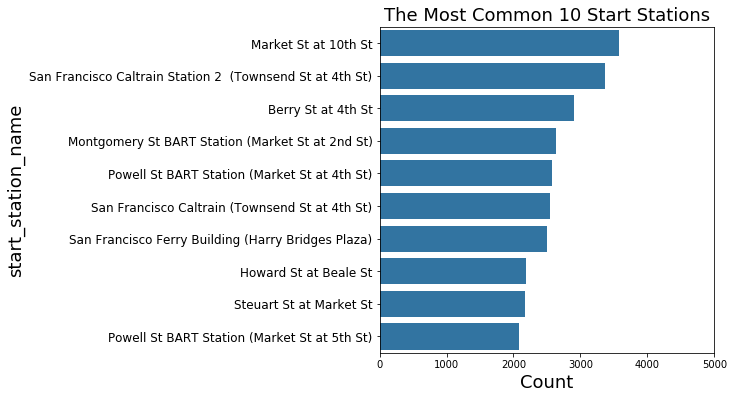

In [29]:
def biketrip(Attribute , title ):
    counts = df_copy[Attribute].value_counts().reset_index(name='number_of_trips')[:10]
    order=counts['index']
    sub=df_copy.loc[df_copy[Attribute].isin(counts["index"])]
    # Styling and defining the graphs
    base_color=sb.color_palette()[0]
    plt.figure(figsize=[6,6])
    ax=sb.countplot(data=sub,y= Attribute, color=base_color, order= order)
    plt.yticks(size=12)
    plt.ylabel(Attribute,size=18)
    plt.xlabel('Count',size=18)
    plt.title(title,size=18);
    plt.xlim(0, 5000)
    
    
biketrip('start_station_name' ,'The Most Common 10 Start Stations')

### 5. What is the most popular places to end a bike trip?

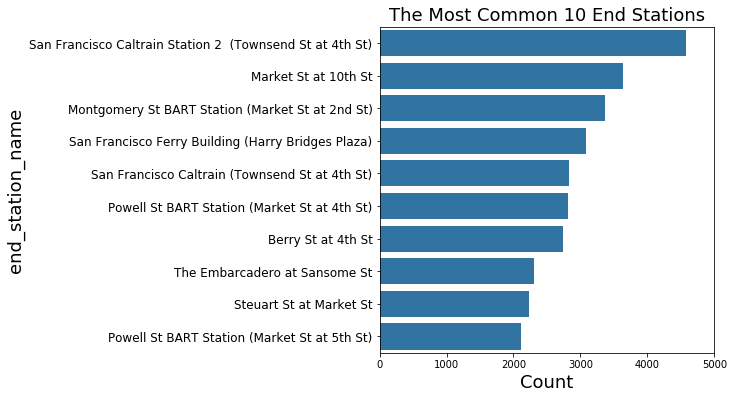

In [30]:
biketrip('end_station_name' ,'The Most Common 10 End Stations') 

### 6. Do most members Share the Bike for all Trip?

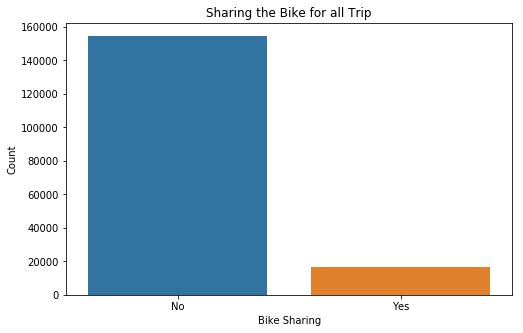

In [31]:
plt.figure(figsize=[8, 5])
sb.countplot(data=df_copy,x='bike_share_for_all_trip' )
plt.xlabel('Bike Sharing')
plt.ylabel('Count')
plt.title('Sharing the Bike for all Trip');

From the above barplot, we find that most of the users didn't share the bike for all trip, nearly about 10 times the members who Shared the Bike for all trip.

### 7. Who ride more, male or female? 

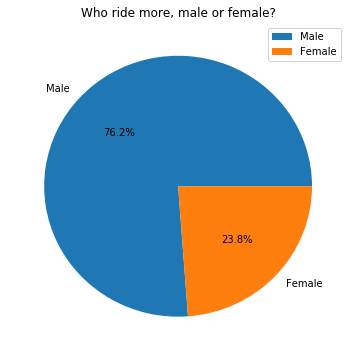

In [32]:
mylabels = ['Male', 'Female']
plt.figure(figsize=[6, 6])
plt.pie(df_copy.member_gender.value_counts() , autopct='%1.1f%%', labels = mylabels)
plt.legend()
plt.title('Who ride more, male or female?');

As illustrated in the above pie chart, male are most likely to ride as they represent 76.2%, while only 23.8% were female.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> Yes, there is some problem such as:
1. Duration, the curve of the duration is right skewed, so I used a logarithmic scale transformation and added an x-axis limit to focus on the most frequent interval.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Yes, there is some problem such as:
1. Age has some unreal values, so i drop the members more than 95 years old for my analysis. 

## Bivariate Exploration


### 1. Is there a relation between age and duration of a trip?

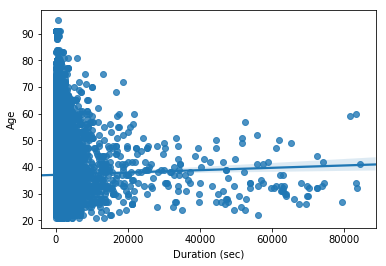

In [33]:
#inspect the relationship between two numeric variables, Seaborn's regplot() function combines scatterplot creation with regression function fitting:
sb.regplot(data = df_copy, x = 'duration_sec', y = 'age');
plt.xlabel('Duration (sec)')
plt.ylabel('Age');

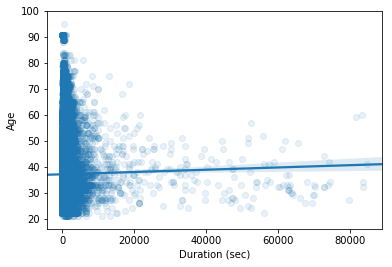

In [34]:
# The scatter_kws helps specifying the opaqueness of the data points.  
sb.regplot(data = df_copy, x = 'duration_sec', y = 'age', truncate=False, x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.scatter(data = df_copy,x = 'duration_sec', y = 'age', alpha=1/20);
plt.xlabel('Duration (sec)')
plt.ylabel('Age');

The above scatter plot shows a weak relationship between the duration and the age, as most ages took a trip for less than 2000 seconds, and the older the members are the less likely to take a long trip.

### 2. Who rides longer, customer  or subscribee?


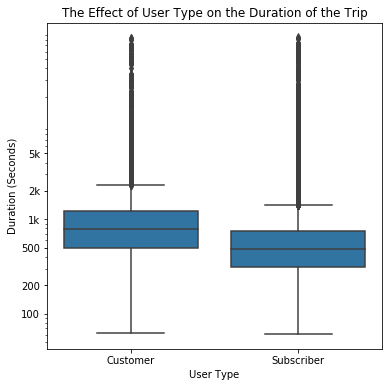

In [35]:
plt.figure(figsize=[6,6])
sb.boxplot(data=df_copy,x='user_type',y='duration_sec',color=sb.color_palette()[0])
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('User Type')
plt.ylabel('Duration (Seconds)')
plt.title('The Effect of User Type on the Duration of the Trip');

The above box plot shows that customers have longer trips than subscribers.

### 3. Who rides longer, male or female?

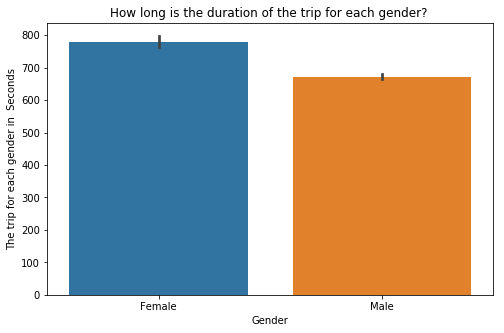

In [36]:
plt.figure(figsize=[8, 5])
sb.barplot(data = df_copy, x = "member_gender", y = "duration_sec")
plt.xlabel('Gender')
plt.ylabel('The trip for each gender in  Seconds')
plt.title("How long is the duration of the trip for each gender? ")
plt.show();

The above bar plot shows that female has longer trips than male.

### 4. Are there specific ages that prefer  one type of subscription than another?

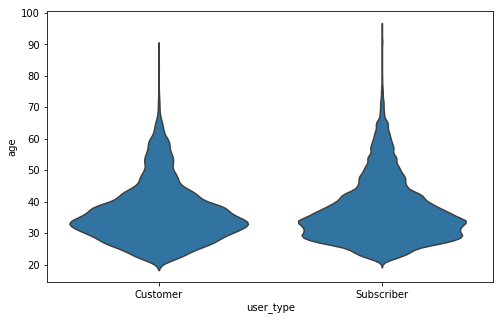

In [37]:
plt.figure(figsize=[8, 5])
base_color = sb.color_palette()[0]
sb.violinplot(data=df_copy, x='user_type', y='age', color=base_color, inner=None);

Age didn't have a special relation with member type. as both shows similar violin plot. 

### 5. Is there a relation between gender and  type of subscription?

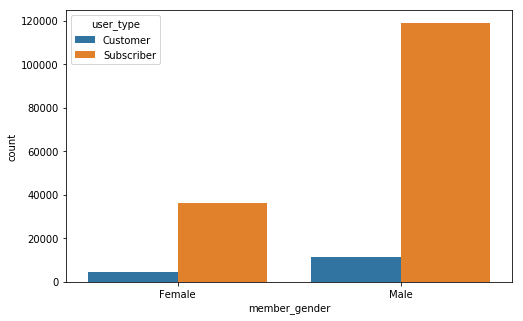

In [38]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df_copy, x = 'member_gender', hue = 'user_type');

The male seems to prefer to subscribe rather the be a casual customer. 

### 6. Is there a relation between bike_share_for_all_trip and  type of subscription?

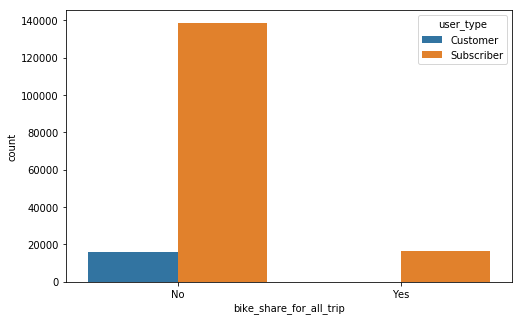

In [39]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df_copy, x = 'bike_share_for_all_trip', hue = 'user_type');

bike_share_for_all_trip and user type relation shows that there is no single Customer shared bike for all trip, and we can conclude that sharing only occurs when a member is a subscriber, and also, with a small percentage. 


### 7. Who prefers to share a bike for all trip, male or female? 

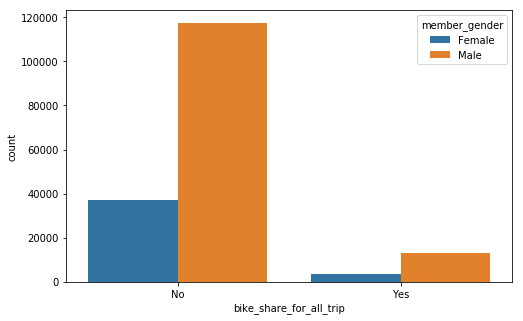

In [40]:
plt.figure(figsize=[8, 5])
sb.countplot(data = df_copy, x = 'bike_share_for_all_trip', hue = 'member_gender');

Male and Female prefer not to share a bike for all trip. However, Male is more likely to share a bike for all trip than female. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


1. Riding duration based on user age scatter plot shows a weak relationship between the duration and the age, as most member's duration ranges are similar.   
2. Customers have longer trips than subscribers.
3. Female has longer trips than male.
4. Age didn't have a special relation with member type. as both shows similar violin plot.
5. The male seems to prefer to subscribe rather the be a casual customers. 
6. bike_share_for_all_trip and user type relation shows that there is no single Customer shared bike for all trip, and we can conclude that sharing only occurs when a member is a subscriber, and also, with a small percentage.
7. Male and Female prefer not to share a bike for all trip. However, Male is more likely to share a bike for all trip than female. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

As, Age Didn't showed clear realtion with duration of the ride, adding extra feature as gender can help for further analysis.

## Multivariate Exploration

### 1. Age, Gender and Bike Sharing

From Bivariate Exploration,  we show that males and females prefer not to share a bike for all trips. adding an extra Feature as age to see if there is the age for both gender is better for sharing? 

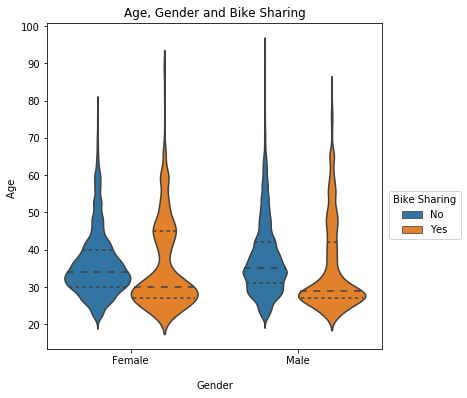

In [41]:
plt.figure(figsize=[6,6])
sb.violinplot(data=df_copy,x='member_gender',y='age',hue='bike_share_for_all_trip',inner='quartile')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Age ')
plt.title('Age, Gender and Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.25,0.5));

Younger age is more likely to share bike for both male and female.

### 2. Duration, Gender and  User type

From Bivariate Exploration,  we show that female has longer trips than male. and customers have longer trips than subscribers, by combining all three features together will the relation change?

### 2.1

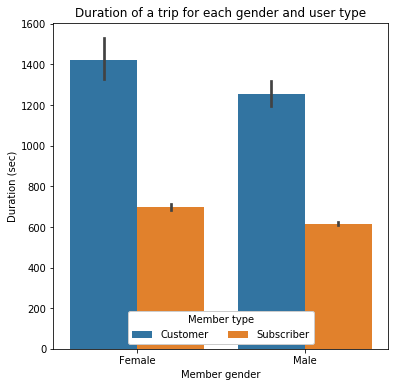

In [42]:
plt.figure(figsize=[6,6])
ax = sb.barplot(data = df_copy, x = 'member_gender', y = 'duration_sec', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Member type');
plt.ylabel('Duration (sec)')
plt.xlabel('Member gender');
plt.title('Duration of a trip for each gender and user type');

The relation didn't change, still female share more than male and customer has longer trip than the subscriber.
and we can say that female customers has longer trip than male customers, and this hold for subscribers.  

### 2.2

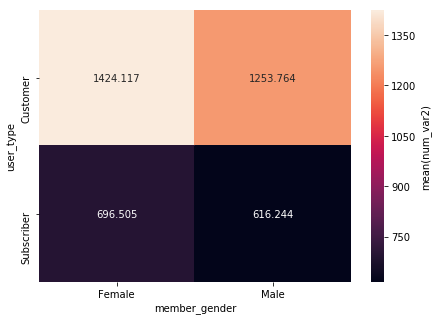

In [43]:
plt.figure(figsize=[7,5])
cat_means = df_copy.groupby(['member_gender', 'user_type']).mean()['duration_sec']
cat_means = cat_means.reset_index(name = 'duration_sec')
cat_means = cat_means.pivot(index = 'user_type', columns = 'member_gender',
                            values = 'duration_sec')
sb.heatmap(cat_means, annot = True, fmt = '.3f',
           cbar_kws = {'label' : 'mean(num_var2)'});

The previous relation also stands here after combing, the female has longer trip whether they are subscribers or customers, and also customers for both male and female is still longer than the subscriber members. 

### 3. Age, Gender and  User type

From Bivariate Exploration, age didn't have a special relation with subscription type. as both shows similar violin plot. Moreover, male seems to prefer to subscribe rather the be a casual customer. by combining all three features together will the relations change?

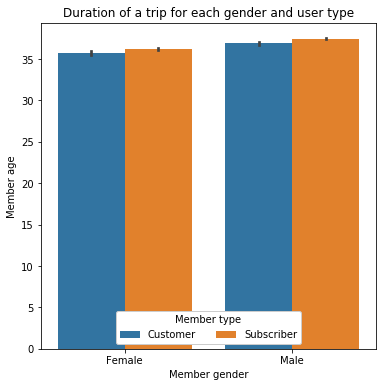

In [44]:
plt.figure(figsize=[6,6])
ax = sb.barplot(data = df_copy, x = 'member_gender', y = 'age', hue = 'user_type')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Member type');
plt.ylabel('Member age')
plt.xlabel('Member gender');
plt.title('Duration of a trip for each gender and user type');

We can't give conclusion if we consider age, user type, and gender together.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>1. From Age, Gender and Bike Sharing, we conclude that younger age is more likely to share bike for both male and female.
>2. From Duration, Gender and User type,  we conclude that female customers have longer trip than male customers, and this holds for subscribers.
>3. Ftrom Age, Gender and User type, we couldn't give conclusion if we consider age, user type, and gender together.

### Were there any interesting or surprising interactions between features?

> No. 

## Conclusions
>In conclusion, after investigating Ford GoBike System Data we conclude the following: 
1. Member age is not an important feature to predict the duration of a trip. 
2. the bike-sharing system should target customers more than subscribers as they represent more than 90% of the members. 
3.  Most members whether they are customers or subscribers don't prefer sharing the Bike for all Trip. 
4. Younger age is more likely to share bikes, both males and females.
6. Males ride a bike more than females as they represent 76.2% of the data, while only 23.8% were female.
7. Female customers have longer trips than male customers, and this holds for subscribers.
